In [1]:
import os, h5py
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import backend as K
import tensorflow.compat.v1.keras.backend as K1
import helper
from tfomics import utils, explain, metrics
import basset, dilated_residualbind2, dilated_residualbind
import logomaker
import pandas as pd
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# save path
results_path = utils.make_directory('../results', 'basset')
params_path = utils.make_directory(results_path, 'model_params')
save_path = utils.make_directory(results_path, 'conv_filters')

In [6]:
# load dataset
data_path = '../data/er.h5'
trainmat = h5py.File(data_path, 'r')
x_test = np.array(trainmat['test_in']).astype(np.float32)
y_test = np.array(trainmat['test_out']).astype(np.int32)
labels = np.array(trainmat['target_labels']).astype(str)
test_headers = np.array(trainmat['test_headers']).astype(str)
x_test = np.squeeze(x_test)
x_test = x_test.transpose([0,2,1])

In [10]:
indices = np.where(np.sum(y_test, axis=0) > 10000)[0]
indices

for i, name in enumerate(labels[indices]):
    print(indices[i],name)

4 Fibrobl
29 Osteobl
116 HMEC
117 HSMM
118 HSMMtube
121 LNCaP
124 Th1


In [5]:
class_index = 4
index = np.where((y_test[:,class_index] == 1)&(np.sum(np.sum(x_test == .25, axis=2), axis=1) == 0) &(np.sum(y_test,axis=1)== 1))[0]
print(len(index))

185


In [13]:
model_name = 'basset'
activation = 'relu'

name = model_name+'_'+activation
model = basset.model(activation)

weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)

scores = explain.saliency(model, X, class_index=class_index, layer=-1)
scores *= X

In [14]:
model_name = 'basset'
activation = 'exponential'

name = model_name+'_'+activation+'_balance'
model = basset.model(activation)

weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)

scores2 = explain.saliency(model, X, class_index=class_index, layer=-1)
scores2 *= X

# plot 

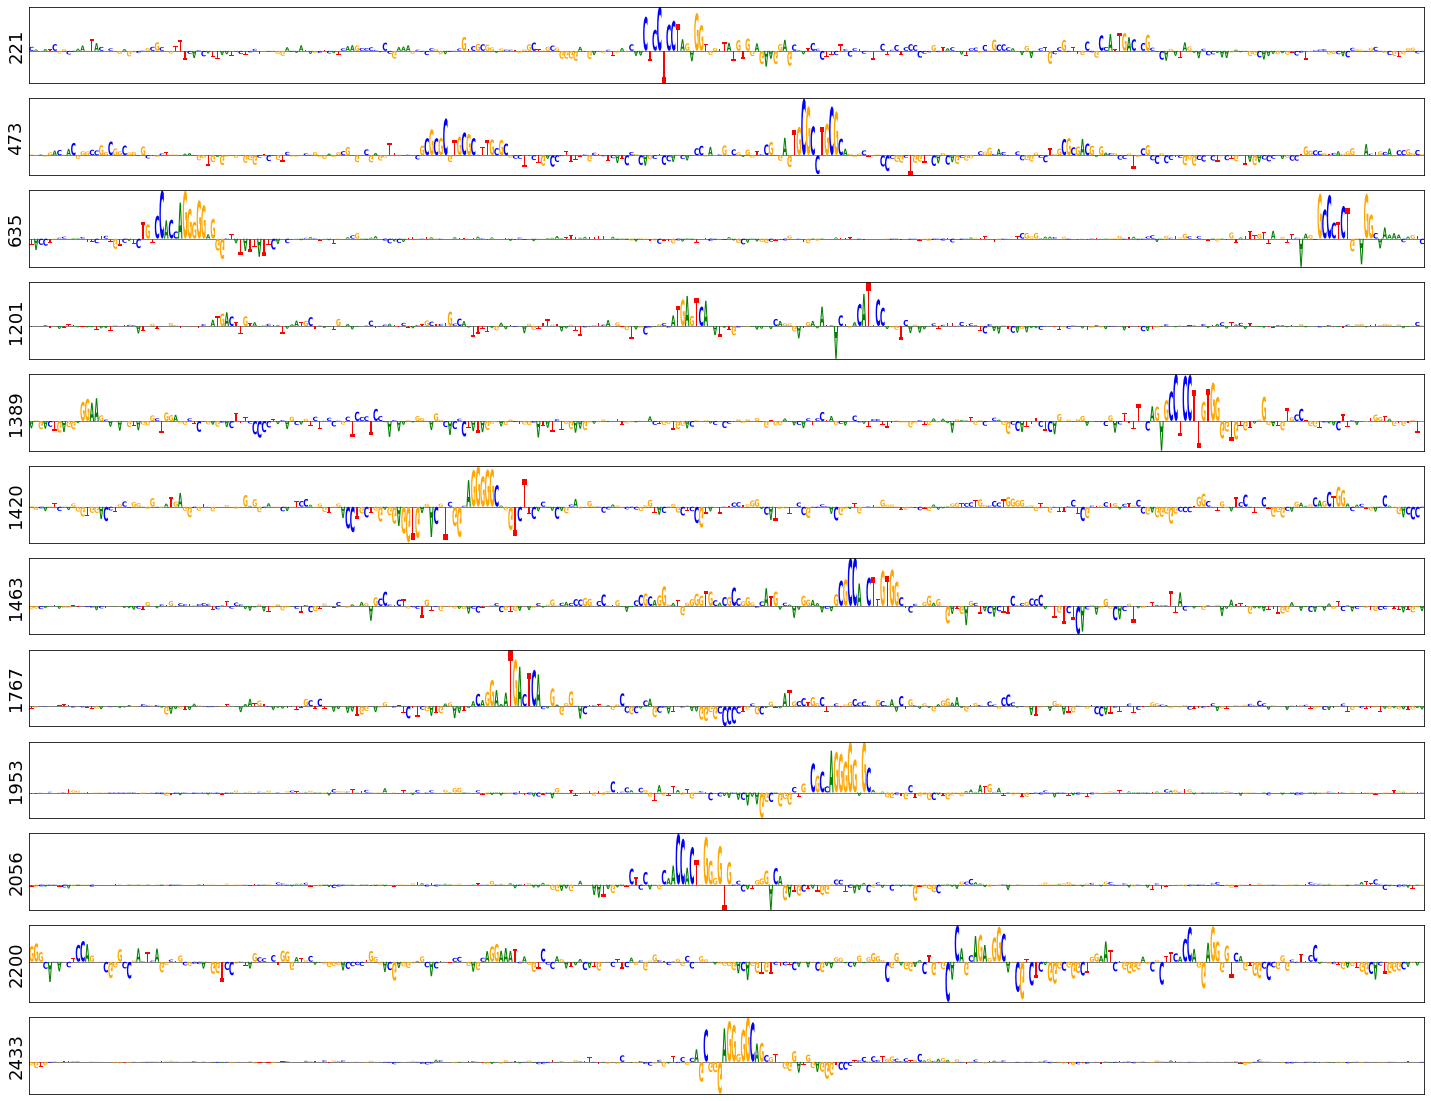

In [154]:
plot_range = range(150,450)
N, L, A = scores.shape
L = len(plot_range)

fig = plt.figure(figsize=(25,20))


for i in range(len(scores)):


    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[i,plot_range[l],a]

    ax = plt.subplot(len(scores),1,i+1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel(index[i], fontsize=18)

outfile = os.path.join(results_path, 'basset_relu.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


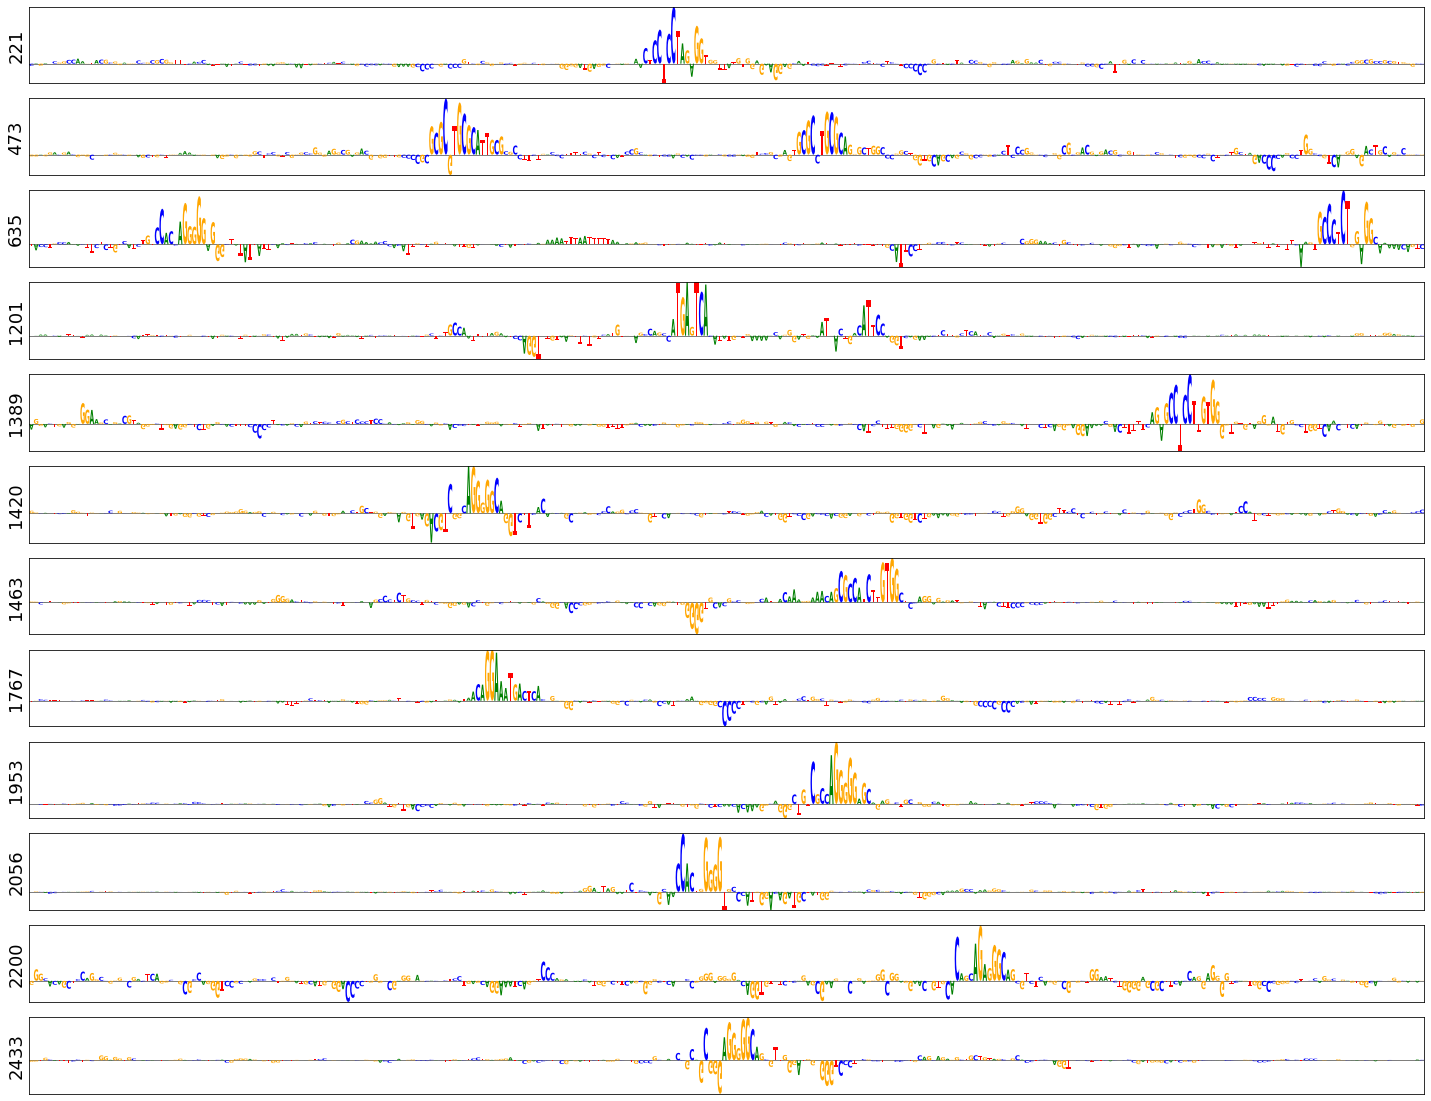

In [153]:
plot_range = range(150,450)
N, L, A = scores.shape
L = len(plot_range)

fig = plt.figure(figsize=(25,20))


for i in range(len(scores)):


    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores2[i,plot_range[l],a]

    ax = plt.subplot(len(scores),1,i+1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel(index[i], fontsize=18)


outfile = os.path.join(results_path, 'basset_exp.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


# probe same region as Basset paper (Fig. 4)

In [ ]:
test = 'TATAAATATTAGTTGAATGGTATGAAGTAAAACAAActtatactggtaatagctttggaatttacaaagcattttcccatgcattatgtcttctcctcctcatattaaccctgcaaacgaaataacattattacccgtactttacagaagaggacactgaagccaaaggagaaaattaactagctcagtcttgcatgacccctgtgaatggactgatcttgaaacccaggtaaccttactccCTGGTCCCAGCCTTTGTTAATGGGGACACAATCCTGGAAATTTTGCCTGTGTGTAAACCTCTAGGGGCTTTTTCTTTCATCGTTTTACATCAGCCAGACTCTGACTCACAGCTGGAGAATCAGCTTCCTTATTATGTAGCGAATTCCATGAACACACACCAAGAGTTGTTTTCTGTAACAGGCTGAAGTAGCTTCTTCTCCCAGTCTCTTTCTCCCATCAAAATTAGAATATCTTTCCTTGGAAAACTGTGCCCAGGTTGAGGGGGACTTCTCCCTGGTTTTGTGTAGACTCTTTGATATGCTCCAAACTCAACGCCTTTCCTTCAATCCCTGGGGCCTTAGGAACAGCCAACCCACA'

L = len(test)
alphabet = 'ACGT'
X = np.zeros((1,L,4))
for l,a in enumerate(test.upper()):
    X[0,l,alphabet.index(a)] = 1

In [ ]:
model_name = 'basset'
activation = 'relu'

class_index = 113
name = model_name+'_'+activation
model = basset.model(activation)

weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)

scores = explain.saliency(model, X, class_index=class_index, layer=-1)
scores *= X

In [ ]:
model_name = 'basset'
activation = 'exponential'

name = model_name+'_'+activation+'_balance'
model = basset.model(activation)

weights_path = os.path.join(params_path, name+'.hdf5')
model.load_weights(weights_path)

scores2 = explain.saliency(model, X, class_index=class_index, layer=-1)
scores2 *= X

In [4]:
plot_range = range(150,430)
N, L, A = scores.shape
L = len(plot_range)
for k, i in enumerate(range(len(scores))):

    fig = plt.figure(figsize=(25,4))

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[i,plot_range[l],a]

    ax = plt.subplot(2,1,1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Relu', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores2[i,plot_range[l],a]

    ax = plt.subplot(2,1,2)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel('Exp', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])


    outfile = os.path.join(results_path, 'basset_compare.pdf')
    fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


NameError: name 'scores' is not defined